-------------------------------------------------------------------------------BIBLIOTECAS-------------------------------------------------------------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from matplotlib.pyplot import figure
import math
from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.decomposition import PCA
import numpy as np
from scipy.cluster import hierarchy
from matplotlib import colors
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.decomposition import PCA
import warnings

In [2]:
import missingno as msno

In [3]:
df =pd.read_csv('customer_segmentation.csv', sep=',')

1Data Collection and Cleaning: Ensure that you have a comprehensive set of customer data. This might include demographic information, purchase history, interaction logs, feedback, and more. Cleaning the data to remove inconsistencies and missing values is crucial for accurate analysis.

2Feature Selection: Determine which features or attributes of the data are most relevant to your segmentation goals. For instance, if you're segmenting for marketing purposes, you might focus on purchase history, demographics, and engagement metrics.

3Exploratory Data Analysis (EDA): Perform an exploratory analysis to understand the distributions, relationships, and patterns in your data. Visualization tools like histograms, scatter plots, and heat maps can be very useful here.

4Statistical Analysis: Apply statistical methods to identify significant differences or correlations between different customer attributes. Techniques like ANOVA, chi-square tests, or correlation analysis can be helpful.

5Segmentation Methods:

 -Cluster Analysis: Use clustering algorithms like K-means, hierarchical clustering, or DBSCAN to group customers into segments based on similarities in their attributes.
Principal Component Analysis (PCA): PCA can reduce the dimensionality of your data, making it easier to identify segments.
Latent Class Analysis: This is particularly useful for categorizing customers based on latent traits inferred from their behaviors or responses.
Interpretation of Segments: Once you have your segments, you need to interpret and label them. This might involve understanding what common characteristics define a segment and how they differ from other segments.

Validation: Validate your segments to ensure they are statistically significant and relevant to your business objectives. This could involve applying the segmentation model to a new set of data or conducting qualitative research.

Application and Monitoring: Finally, apply your segmentation in business strategy (e.g., targeted marketing, personalized product development). Continuously monitor the performance of segments and refine them as necessary based on new data and changing market conditions.

-------------------------------------------------------------------------------ANÁLISE EXPLORATÓRIA-------------------------------------------------------------------------------

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000



------------------------------------- MISSING -------------------------------------------


In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

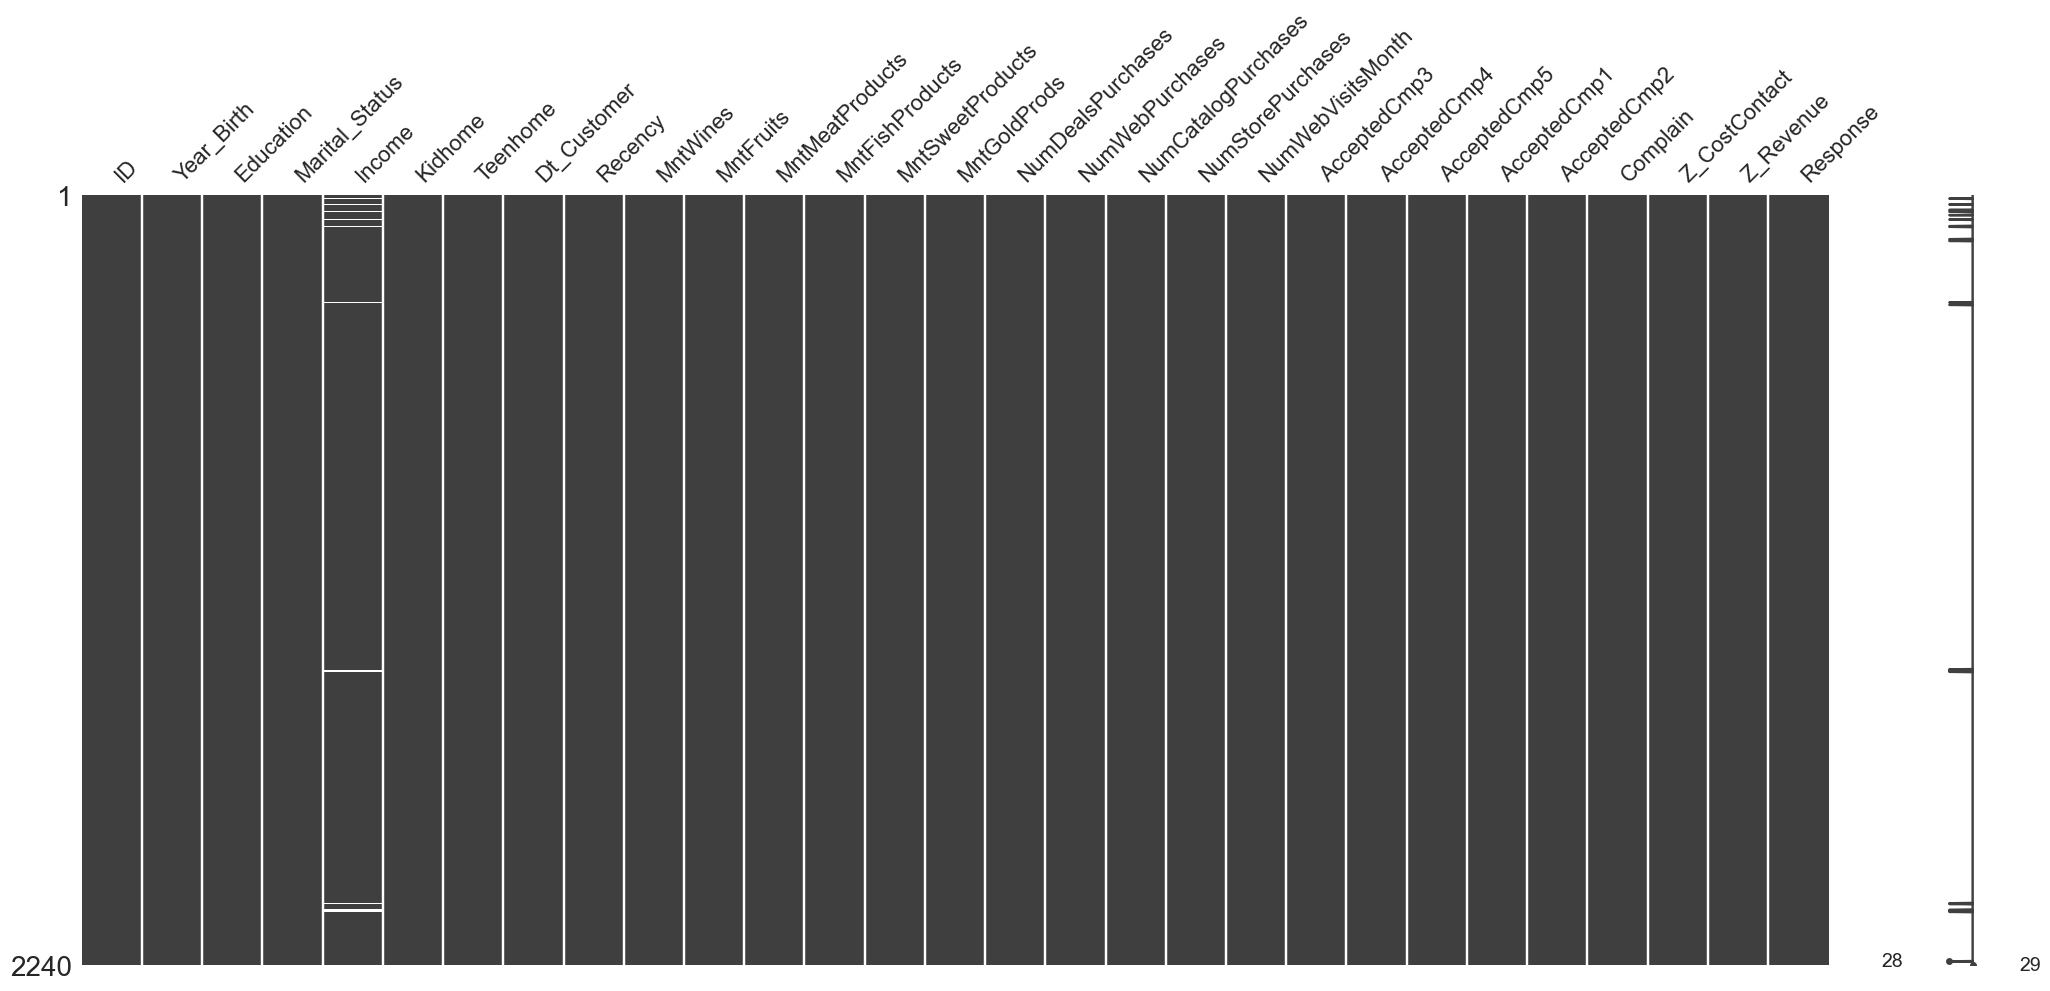

In [7]:
msno.matrix(df)

In [8]:
df.shape

(2240, 29)

In [9]:
df['Age_on_2014'] = 2014 - df['Year_Birth']

In [10]:
df['Age_on_2014']

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age_on_2014, Length: 2240, dtype: int64

In [11]:
# As 3 ocorrências serão consideradas outliers. Idades acima de 90 anos
df.loc[df['Age_on_2014'] > 90]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_on_2014
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,114
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,121
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,115


Nessa análise as instâncias abaixo, para idade < 20, não serão deletadas como possíveis outliers.

Provavelmente alguns dados ainda não reproduzem a realidade. Em termos de prova de conceito, isso será relevado.

In [12]:
df.loc[df['Age_on_2014'] < 20]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_on_2014
46,9909,1996,2n Cycle,Married,7500.0,0,0,09-11-2012,24,3,...,0,0,0,0,0,0,3,11,1,18
696,8315,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,...,0,0,0,0,0,0,3,11,0,19
747,10548,1995,Graduation,Single,71163.0,0,0,09-03-2014,30,283,...,0,0,0,0,0,0,3,11,0,19
995,5184,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,...,0,0,0,0,0,0,3,11,0,19
1170,193,1996,Basic,Married,14421.0,0,0,17-02-2014,81,0,...,1,0,0,0,0,0,3,11,0,18
1850,4427,1995,2n Cycle,Single,83257.0,0,0,18-09-2012,56,536,...,1,0,1,0,0,1,3,11,1,19
2213,3661,1995,2n Cycle,Single,80617.0,0,0,12-10-2012,42,594,...,0,0,0,0,0,0,3,11,0,19


In [13]:
df.loc[df['Income'] > 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_on_2014
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,0,3,11,0,37


--------------- Serão considerados outliers em função da idade fora do normal e do salário anual (consideração superficial) ----------------------

--------------- Exclusão dos outliers ----------------

In [14]:
df = df[(df["Age_on_2014"]<90)]
df = df[(df["Income"]<200000)]
print("Total de ocorrências após a remoção dos outliers:", len(df))

Total de ocorrências após a remoção dos outliers: 2212


In [15]:
df.dropna(subset=['Income'],how='any',inplace=True,axis=0)
df['Income'].isnull().sum()

0

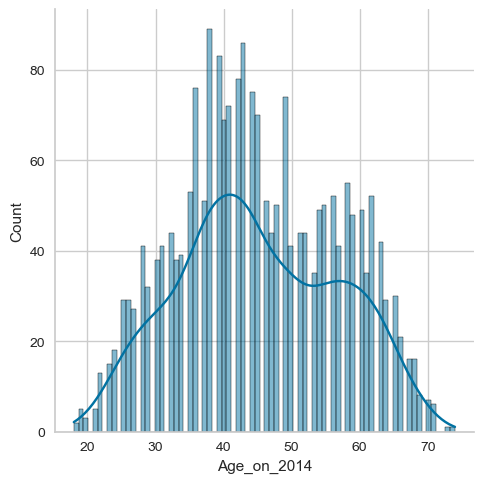

In [16]:
hist3= sns.displot( data=df['Age_on_2014'], kde=True,bins=80 )

----------------------------------------------------------------------------

In [17]:
#GROUP AGE


bins = [15,20,30,45,60,75,90]
labels =['[15,20)','[20,30)','[30,45)','[45,60)','[60,75)','[75,90)']
group_age =pd.cut(df['Age_on_2014'], bins=bins,labels=labels)
group_age


0       [45,60)
1       [45,60)
2       [45,60)
3       [20,30)
4       [30,45)
         ...   
2235    [45,60)
2236    [60,75)
2237    [30,45)
2238    [45,60)
2239    [45,60)
Name: Age_on_2014, Length: 2212, dtype: category
Categories (6, object): ['[15,20)' < '[20,30)' < '[30,45)' < '[45,60)' < '[60,75)' < '[75,90)']

In [18]:
df['group_age']=group_age.tolist()

In [19]:
group_age.to_frame(name='grupo_idade')

,grupo_idade
0,"[45,60)"
1,"[45,60)"
2,"[45,60)"
3,"[20,30)"
4,"[30,45)"
...,...
2235,"[45,60)"
2236,"[60,75)"
2237,"[30,45)"
2238,"[45,60)"


---------------------------------------------------------------------------------

In [20]:
#Drop colunas que representam os mesmos resultados em todas as ocorrências. Não agrega valor 
df.pop('Z_CostContact')

0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Z_CostContact, Length: 2212, dtype: int64

In [21]:
df.pop('Z_Revenue')

0       11
1       11
2       11
3       11
4       11
        ..
2235    11
2236    11
2237    11
2238    11
2239    11
Name: Z_Revenue, Length: 2212, dtype: int64

In [22]:
df.pop('Year_Birth')

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2212, dtype: int64

-------------------------------------------------------------------------------Data Wrangling-------------------------------------------------------------------------------

In [23]:
#COLUNAS CALCULADAS

# 1. Total children // Family Size
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
df['Living_with'] = df['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Single_+", "Widow":"Divorced_Widow", "YOLO":"Single_+", "Divorced":"Divorced_Widow", "Single":"Alone"})
df['Family_size'] = df['Living_with'].replace({"Alone": 1, "Partner": 2,'Single_+':1,'Divorced_Widow':1}) + df['TotalChildren']

# Total Prod Purchases
df['Total_Amount_Spent'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

# Total Purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Total Purchases
df['Accepted_Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# Deal Dependency - Proporção de compras realizadas através de desconto
df['Deal_Dependency'] = df['NumDealsPurchases'] / df['Total_Purchases']

# Days Since Customer (corrected to handle DD-MM-YYYY format)
df['Days_Since_Customer'] = (pd.to_datetime('today') - pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')).dt.days.astype(int)

# Aplicação função -MAP- para alterar/adequar os dados categóricos semelhantes e otimizar as análises posteriormente
df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Master", "Graduation":"Bachelor", "Master":"Master", "PhD":"PhD"})

C:\Users\casa\AppData\Local\Temp\ipykernel_4972\1521438152.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family_size'] = df['Living_with'].replace({"Alone": 1, "Partner": 2,'Single_+':1,'Divorced_Widow':1}) + df['TotalChildren']


In [24]:
df.dropna(subset=['Deal_Dependency'],how='any',inplace=True)
df['Deal_Dependency'].isnull().sum()

0

In [25]:
unique_df=df[['Education', 'Living_with']]
for column in unique_df.columns.values.tolist():
    print(unique_df[column].value_counts(), '\n') 

Education
Bachelor         1112
Master            563
PhD               479
Undergraduate      54
Name: count, dtype: int64 

Living_with
Partner           1427
Alone              472
Divorced_Widow     305
Single_+             4
Name: count, dtype: int64 



In [26]:
educacao = df.groupby(['Education']).count()
educacao

,ID,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Age_on_2014,group_age,TotalChildren,Living_with,Family_size,Total_Amount_Spent,Total_Purchases,Accepted_Campaign,Deal_Dependency,Days_Since_Customer
Education,,,,,,,,,,,,,,,,,,,,,
Bachelor,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,...,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112
Master,563,563,563,563,563,563,563,563,563,563,...,563,563,563,563,563,563,563,563,563,563
PhD,479,479,479,479,479,479,479,479,479,479,...,479,479,479,479,479,479,479,479,479,479
Undergraduate,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54


In [27]:
Marital = df.groupby(['Living_with']).count()
Marital

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Response,Age_on_2014,group_age,TotalChildren,Family_size,Total_Amount_Spent,Total_Purchases,Accepted_Campaign,Deal_Dependency,Days_Since_Customer
Living_with,,,,,,,,,,,,,,,,,,,,,
Alone,472,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,472,472,472,472
Divorced_Widow,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305
Partner,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427,...,1427,1427,1427,1427,1427,1427,1427,1427,1427,1427
Single_+,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


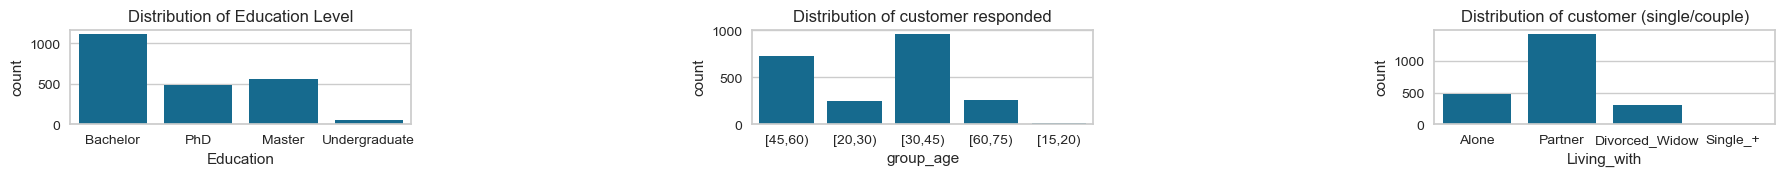

In [28]:
plt.figure(figsize = (22, 16))
plt.subplots_adjust(hspace = 2.0, wspace=1.0)

plt.subplot(5, 3, 1)
sns.countplot(df, x = 'Education')
plt.title("Distribution of Education Level")

plt.subplot(5, 3, 2)
sns.countplot(df, x = 'group_age')
plt.title('Distribution of customer responded')

plt.subplot(5, 3, 3)
sns.countplot(df, x = 'Living_with')
plt.title("Distribution of customer (single/couple)")


plt.show()

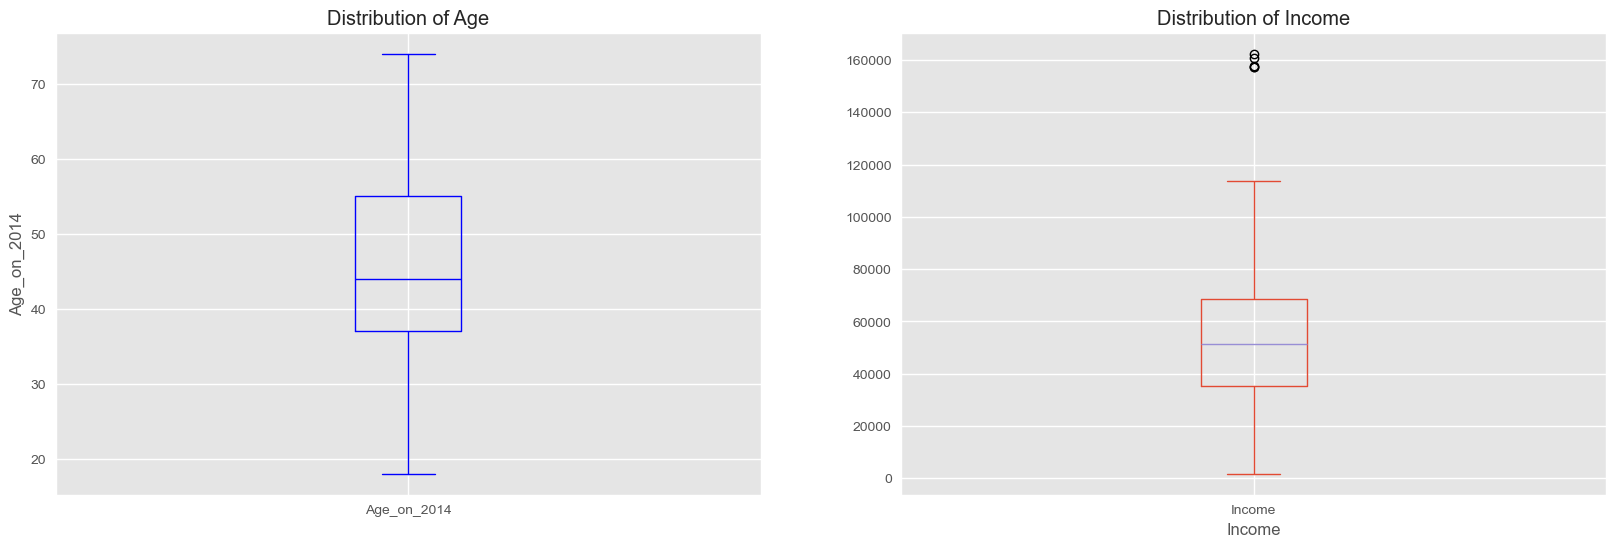

In [29]:
# Import libraries for visualization 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # for ggplot style
import seaborn as sns

# Visualization of 'Age' and 'Income' to see the distribution
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#subplot1: box plot
df['Age_on_2014'].plot(kind='box', figsize=(20,6), color='blue', ax=ax0)
ax0.set_title("Distribution of Age")
ax0.set_ylabel("Age_on_2014")

#subplot2: box plot
df['Income'].plot(kind='box', figsize=(20,6), ax=ax1)
ax1.set_title("Distribution of Income")
ax1.set_xlabel("Income")

plt.show()

OUTLIERS REMOVIDOS PARA INCOME.

Boxplot mostra outros novos OUTLIERS, mas é plausível manter por ser um dado possivelmente real

#Compreensão do perfil de compra para possíveis recomendações de oferta (basket analysis), personalização de campanhas de mkt e previsão de vendas
    - Variáveis: 
        
        #Total $ produtos ->                                        'Wine', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'
        #Número de compras por canal de venda ->                    'NumDealsPurchase', 'NumWebPurchase', 'NumCatalogPurchase', 'NumStorePurchase' 
        #Perfil digital (consome pela internet) ->                  'WebVisitsMonth', 'AcceptedCmp 1,2,3,4,5'
        
        

In [30]:
age_group_campaign = df.groupby(by='group_age').sum()['Response']
age_group_campaign

group_age
[15,20)      3
[20,30)     44
[30,45)    149
[45,60)     95
[60,75)     42
Name: Response, dtype: int64

In [31]:
a=pd.pivot_table(df,values=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],columns='group_age',aggfunc='sum')
a.fillna(0)

group_age,"[15,20)","[20,30)","[30,45)","[45,60)","[60,75)"
MntFishProducts,606,9309,33781,28110,11470
MntFruits,217,7264,23474,19903,7379
MntGoldProds,313,10930,38135,34183,13599
MntMeatProducts,3407,45444,145977,121887,52750
MntSweetProducts,372,7227,24332,20091,7803
MntWines,3401,58706,255258,253661,104263


In [32]:
b=pd.pivot_table(df,values=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],columns='Marital_Status',aggfunc='sum')
b.fillna(0)

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
MntFishProducts,411,23,8121,30394,18255,22271,3793,8
MntFruits,169,12,6355,21980,12839,14454,2422,6
MntGoldProds,408,81,10712,36718,20394,24518,4245,84
MntMeatProducts,625,79,34838,137886,87058,94794,14085,100
MntSweetProducts,61,21,6217,22925,12751,14966,2878,6
MntWines,711,554,75346,256974,137207,175951,27902,644


<Axes: title={'center': 'Conversão camp_mkt por faixa etária'}, xlabel='group_age'>

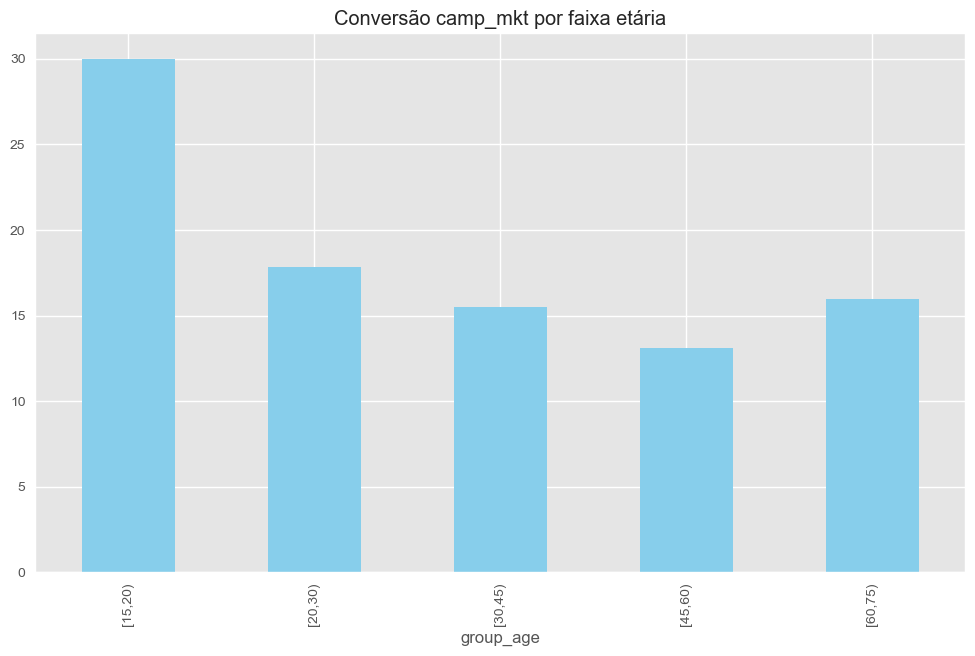

In [33]:
# Taxa de engajamento em campanha de marketing, por blocos de idade
conta_grupos = df.groupby(by='group_age')['Response'].sum()/df.groupby(by='group_age')['Response'].count()*100
conta_grupos.plot(kind='bar',color='skyblue',grid=True,figsize=(12,7),title ='Conversão camp_mkt por faixa etária')

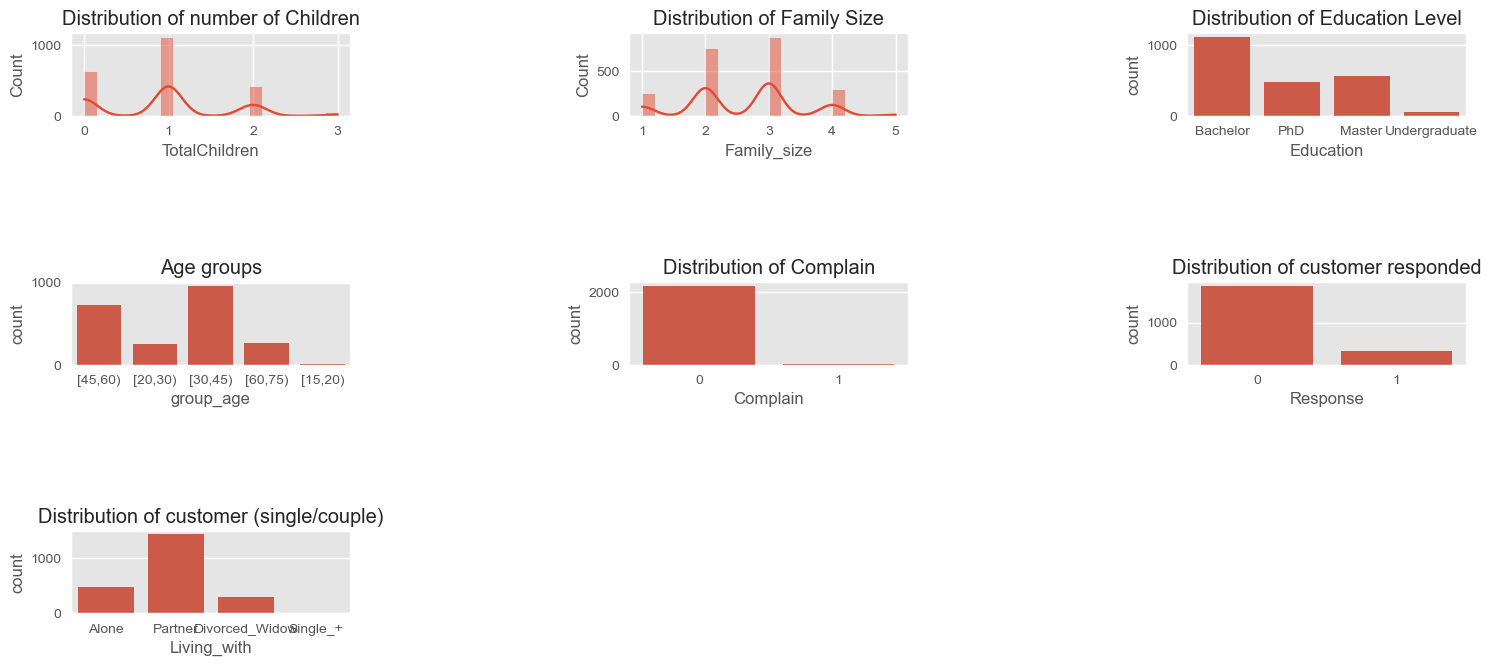

In [34]:
plt.figure(figsize = (18, 14))
plt.subplots_adjust(hspace = 2.0, wspace=1.0)

plt.subplot(5, 3, 1)
sns.histplot(df, x = 'TotalChildren', kde = True, bins = 20)
plt.title("Distribution of number of Children")

plt.subplot(5, 3, 2)
sns.histplot(df, x = 'Family_size', kde = True, bins = 20)
plt.title('Distribution of Family Size')

plt.subplot(5, 3, 3)
sns.countplot(df, x = 'Education')
plt.title("Distribution of Education Level")

plt.subplot(5, 3, 4)
sns.countplot(df, x = 'group_age')
plt.title('Age groups')

plt.subplot(5, 3, 5)
sns.countplot(df, x = 'Complain')
plt.title('Distribution of Complain')

plt.subplot(5, 3, 6)
sns.countplot(df, x = 'Response')
plt.title('Distribution of customer responded')

plt.subplot(5, 3, 7)
sns.countplot(df, x = 'Living_with')
plt.title("Distribution of customer (single/couple)")


plt.show()

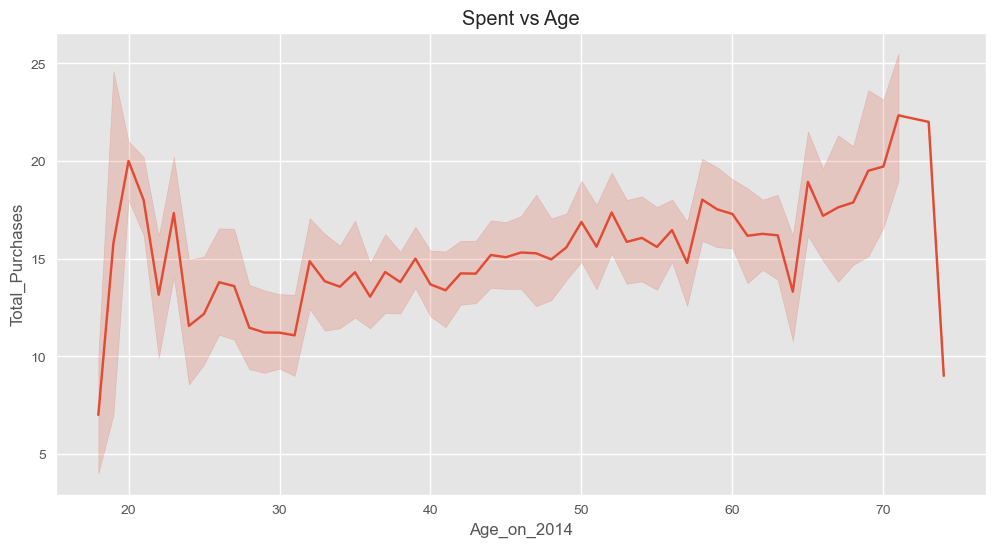


Correlation between Age_on_2014 and Spent: 0.18332013516150772


In [35]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'Age_on_2014', y = 'Total_Purchases')
plt.title("Spent vs Age")
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Age_on_2014'].corr(df['Total_Purchases'])}")

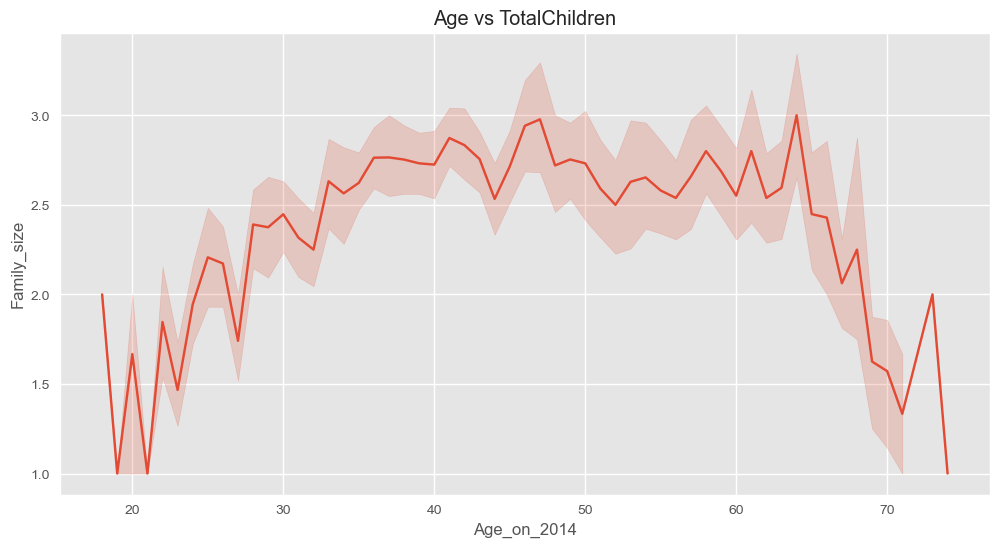


Correlation between Age_on_2014 and Spent: 0.07903338092430064


In [36]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'Age_on_2014', y = 'Family_size')
plt.title("Age vs TotalChildren")
plt.show()
print(f"\nCorrelation between Age_on_2014 and Spent: {df['Age_on_2014'].corr(df['Family_size'])}")

------------------------------------------------------ENCODING // FEATURE SELECTION------------------------------------------------------

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Education            2208 non-null   object 
 2   Marital_Status       2208 non-null   object 
 3   Income               2208 non-null   float64
 4   Kidhome              2208 non-null   int64  
 5   Teenhome             2208 non-null   int64  
 6   Dt_Customer          2208 non-null   object 
 7   Recency              2208 non-null   int64  
 8   MntWines             2208 non-null   int64  
 9   MntFruits            2208 non-null   int64  
 10  MntMeatProducts      2208 non-null   int64  
 11  MntFishProducts      2208 non-null   int64  
 12  MntSweetProducts     2208 non-null   int64  
 13  MntGoldProds         2208 non-null   int64  
 14  NumDealsPurchases    2208 non-null   int64  
 15  NumWebPurchases      2208 non-null   int64 

In [38]:
df[['Living_with','group_age','Education','Marital_Status']]

,Living_with,group_age,Education,Marital_Status
0,Alone,"[45,60)",Bachelor,Single
1,Alone,"[45,60)",Bachelor,Single
2,Partner,"[45,60)",Bachelor,Together
3,Partner,"[20,30)",Bachelor,Together
4,Partner,"[30,45)",PhD,Married
...,...,...,...,...
2235,Partner,"[45,60)",Bachelor,Married
2236,Partner,"[60,75)",PhD,Together
2237,Divorced_Widow,"[30,45)",Bachelor,Divorced
2238,Partner,"[45,60)",Master,Together


In [39]:
df.pop('group_age')

0       [45,60)
1       [45,60)
2       [45,60)
3       [20,30)
4       [30,45)
         ...   
2235    [45,60)
2236    [60,75)
2237    [30,45)
2238    [45,60)
2239    [45,60)
Name: group_age, Length: 2208, dtype: object

In [40]:
a = (df.dtypes == 'object')
object_cols = list(a[a].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status', 'Dt_Customer', 'Living_with']


In [41]:
############### ENCODER
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for i in object_cols:
  df[i] = df[[i]].apply(LE.fit_transform)


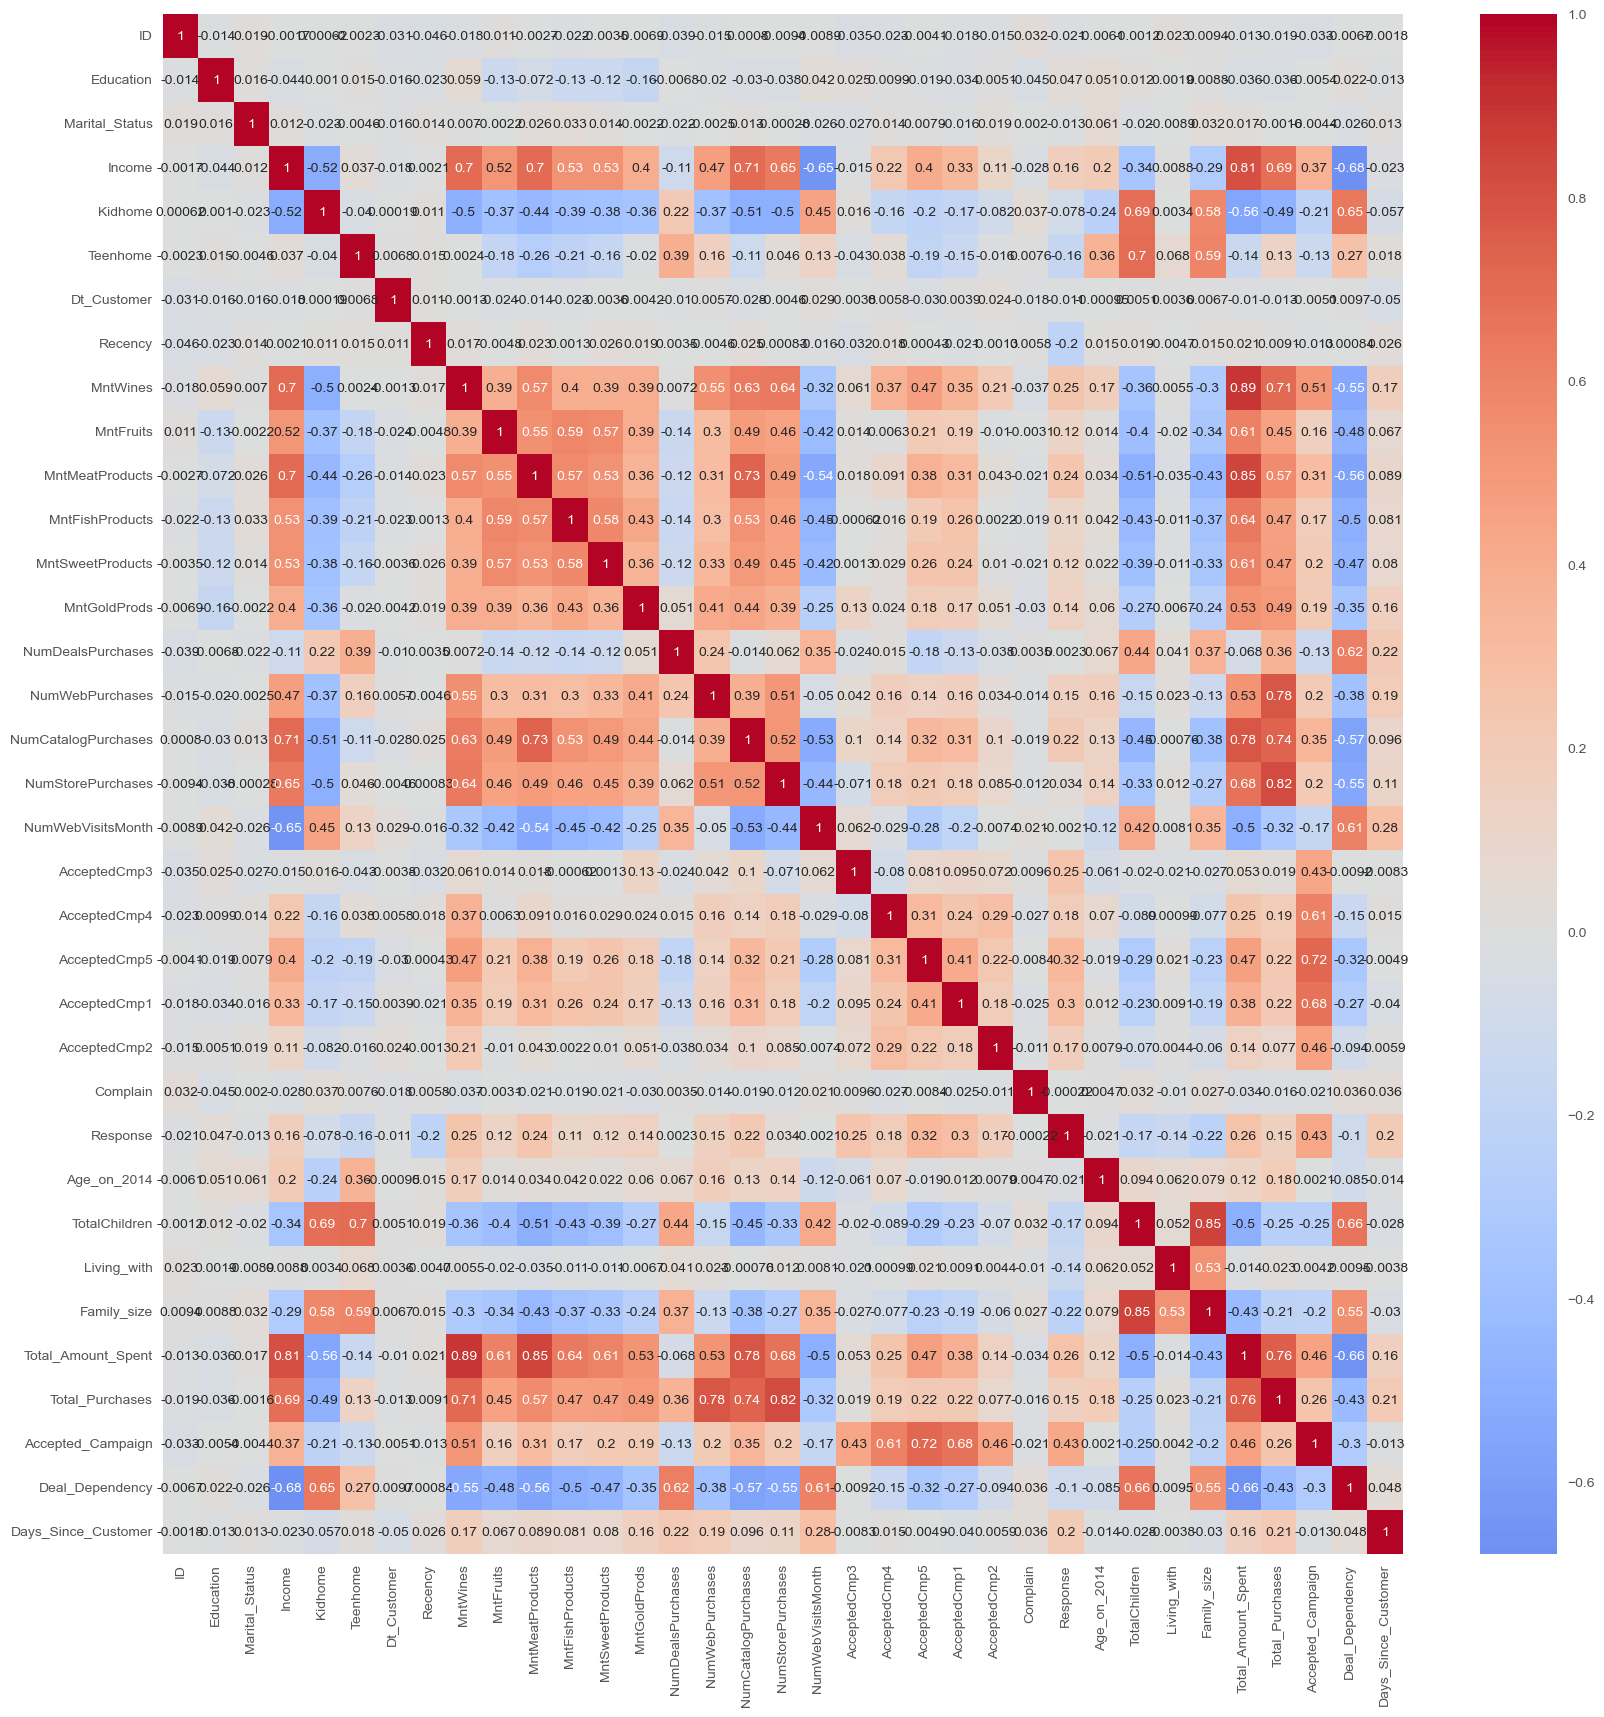

In [42]:
corrmax = df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corrmax, annot = True, cmap = 'coolwarm', center = 0)
plt.show()

In [43]:
columns_to_drop = ['NumDealsPurchases', 'NumWebPurchases', 
                   'NumCatalogPurchases', 'NumStorePurchases', 
                   'Dt_Customer','ID', 'Teenhome', 'Kidhome',
                   'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
                   'AcceptedCmp4','AcceptedCmp5']

df = df.drop(columns=columns_to_drop)

------------------------------------------ STANDARD SCALER E PCA ------------------------------------------

In [44]:
df1 = df.copy()

scaler = StandardScaler()
scaler.fit(df1)
scaled_df1 = pd.DataFrame(scaler.transform(df1), columns = df1.columns)

In [45]:
scaled_df1

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age_on_2014,TotalChildren,Living_with,Family_size,Total_Amount_Spent,Total_Purchases,Accepted_Campaign,Deal_Dependency,Days_Since_Customer
0,-0.873272,0.253214,0.292925,0.311060,0.975863,1.550053,1.688262,2.451041,1.481762,0.850833,...,2.372895,1.018743,-1.266516,-1.745327,-1.761762,1.674434,1.317746,-0.439634,-0.545165,1.526655
1,-0.873272,0.253214,-0.261644,-0.380080,-0.874099,-0.638273,-0.719275,-0.651903,-0.634855,-0.734941,...,-0.421426,1.275141,1.403143,-1.745327,0.447193,-0.965102,-1.165726,-0.439634,1.376512,-1.190250
2,-0.873272,1.181947,0.926537,-0.794765,0.356244,0.569079,-0.179808,1.337632,-0.148276,-0.038747,...,-0.421426,0.335013,-1.266516,0.685251,-0.657284,0.278302,0.794910,-0.439634,-1.197162,-0.207224
3,-0.873272,1.181947,-1.187869,-0.794765,-0.874099,-0.562814,-0.656857,-0.505882,-0.586197,-0.754280,...,-0.421426,-1.288844,0.068313,0.685251,0.447193,-0.921940,-0.904308,-0.439634,0.625857,-1.061814
4,1.418095,-0.675518,0.300213,1.555113,-0.393821,0.418160,-0.219934,0.151212,-0.002303,-0.560893,...,-0.421426,-1.032445,0.068313,0.685251,0.447193,-0.309368,0.533492,-0.439634,0.744381,-0.953138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,-0.873272,-0.675518,0.437986,-0.103624,1.195249,0.418160,0.065404,0.078202,2.211629,3.925687,...,-0.421426,0.164081,0.068313,0.685251,0.447193,1.216250,0.402783,-0.439634,-0.625234,0.133624
2204,1.418095,1.181947,0.569222,0.241946,0.296950,-0.663427,-0.612273,-0.688408,-0.659184,-0.696263,...,-0.421426,1.958871,2.737973,0.685251,2.656149,-0.272846,0.925619,1.031142,1.240029,-1.654593
2205,-0.873272,-1.604251,0.238522,1.451442,1.785221,0.543926,0.221448,-0.104324,-0.367237,-0.386844,...,-0.421426,-1.032445,-1.266516,-0.530038,-1.761762,1.050242,0.533492,1.031142,-1.152010,-0.982777
2206,0.272411,1.181947,0.815190,-1.416791,0.362173,0.091169,0.208073,0.771801,0.070684,0.328688,...,-0.421426,1.104209,0.068313,0.685251,0.447193,0.389528,1.056328,-0.439634,-0.842815,-0.977837


In [46]:
pca = PCA(random_state = 42, svd_solver = 'full')
pca.fit(scaled_df1)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [47]:
cumsum

array([0.33089801, 0.41275827, 0.48596183, 0.5469853 , 0.59742618,
       0.64400089, 0.6895766 , 0.73364585, 0.77663525, 0.8127939 ,
       0.84482293, 0.87434984, 0.89825815, 0.91813146, 0.9367479 ,
       0.95511188, 0.97054486, 0.98289042, 0.99279497, 0.99918648,
       1.        , 1.        ])

In [48]:
cumsum[16]

0.9705448626773382

In [49]:
cumsum[15]

0.9551118820235528

In [50]:
scaled_df1.tail()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age_on_2014,TotalChildren,Living_with,Family_size,Total_Amount_Spent,Total_Purchases,Accepted_Campaign,Deal_Dependency,Days_Since_Customer
2203,-0.873272,-0.675518,0.437986,-0.103624,1.195249,0.418160,0.065404,0.078202,2.211629,3.925687,...,-0.421426,0.164081,0.068313,0.685251,0.447193,1.216250,0.402783,-0.439634,-0.625234,0.133624
2204,1.418095,1.181947,0.569222,0.241946,0.296950,-0.663427,-0.612273,-0.688408,-0.659184,-0.696263,...,-0.421426,1.958871,2.737973,0.685251,2.656149,-0.272846,0.925619,1.031142,1.240029,-1.654593
2205,-0.873272,-1.604251,0.238522,1.451442,1.785221,0.543926,0.221448,-0.104324,-0.367237,-0.386844,...,-0.421426,-1.032445,-1.266516,-0.530038,-1.761762,1.050242,0.533492,1.031142,-1.152010,-0.982777
2206,0.272411,1.181947,0.815190,-1.416791,0.362173,0.091169,0.208073,0.771801,0.070684,0.328688,...,-0.421426,1.104209,0.068313,0.685251,0.447193,0.389528,1.056328,-0.439634,-0.842815,-0.977837
2207,1.418095,-0.675518,0.045170,-0.310966,-0.657677,-0.587967,-0.474063,-0.651903,-0.634855,-0.444860,...,2.372895,1.275141,1.403143,0.685251,1.551671,-0.724390,-0.512180,-0.439634,0.830581,1.324122


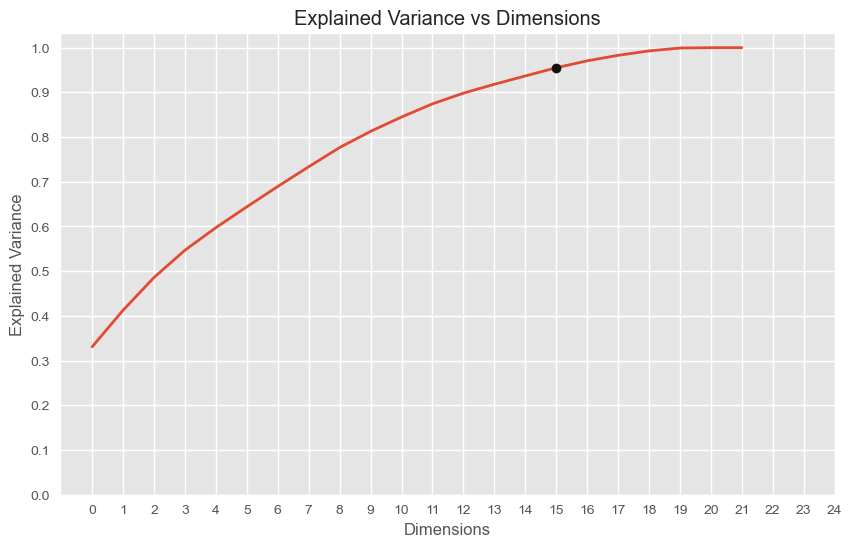

In [51]:
plt.figure(figsize = (10, 6))

plt.plot(cumsum, linewidth=2)

plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs Dimensions")
plt.plot(15, cumsum[15], "ko")
plt.xticks(np.arange(0, 25, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)

plt.show()

In [52]:
pca.explained_variance_ratio_

array([3.30898008e-01, 8.18602666e-02, 7.32035543e-02, 6.10234704e-02,
       5.04408759e-02, 4.65747114e-02, 4.55757155e-02, 4.40692484e-02,
       4.29894035e-02, 3.61586471e-02, 3.20290326e-02, 2.95269100e-02,
       2.39083040e-02, 1.98733096e-02, 1.86164439e-02, 1.83639811e-02,
       1.54329807e-02, 1.23455585e-02, 9.90454676e-03, 6.39151302e-03,
       8.13519051e-04, 2.24211968e-32])

In [53]:
pca = PCA(n_components = 15, random_state = 42, svd_solver = 'full')
pca.fit(scaled_df1)
df1_reduced = pd.DataFrame(pca.transform(scaled_df1), columns = (['col1', 'col2', 'col3', 'col4',
                                                                  'col5', 'col6', 'col7', 'col8',
                                                                  'col9', 'col10', 'col11', 'col12',
                                                                  'col13', 'col14', 'col15']))

In [54]:
df1_reduced

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,4.453811,-0.881269,1.907585,2.239147,-1.149516,0.869843,-0.532141,-0.964873,-0.514502,-0.013420,-1.684674,-0.125919,0.000146,-0.929596,0.687586
1,-2.692010,-0.381522,-0.721786,-0.588936,-0.380402,1.401106,0.458669,-1.379553,-1.871775,0.528744,-0.300075,-0.273989,-0.118858,-0.021586,0.197410
2,1.934541,-0.237559,-1.166302,0.056493,0.212013,0.939616,-1.141516,0.292400,0.099241,-1.121089,0.564210,-0.497482,-0.237287,-0.484193,0.189383
3,-2.522343,-0.731965,-0.775326,0.067780,1.280845,0.543339,-0.906020,1.198718,-0.437550,0.013310,0.700220,-0.283061,-0.143398,-0.307071,0.091228
4,-0.568365,0.280323,-1.051349,-0.313439,-0.239554,-1.572147,0.523912,0.537661,0.895366,1.458542,-0.316244,0.578654,0.099692,-0.531098,-0.054561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2.543812,1.647121,-0.532909,1.813748,0.592874,-0.476043,0.019232,-0.803875,-0.406396,-0.757762,1.176749,2.117606,-0.129344,1.422048,-0.567850
2204,-2.097293,3.854706,-0.256140,-2.601627,-0.767857,0.791238,0.071377,-0.014421,-0.970061,1.375676,-0.091532,0.559907,-0.878048,-0.378922,0.140404
2205,2.132240,-1.516987,0.139586,-0.267309,-0.083350,-1.970394,2.118910,0.430909,-0.504284,-0.505315,0.893911,-0.735265,-0.987451,-1.082787,-0.413620
2206,1.393903,1.121180,-1.303178,-1.185473,0.215936,1.386335,-1.260718,-0.516846,0.162006,-0.180088,0.708451,0.142664,0.010460,-0.077080,0.300850


Elbow Method to determine the number of clusters to be formed:


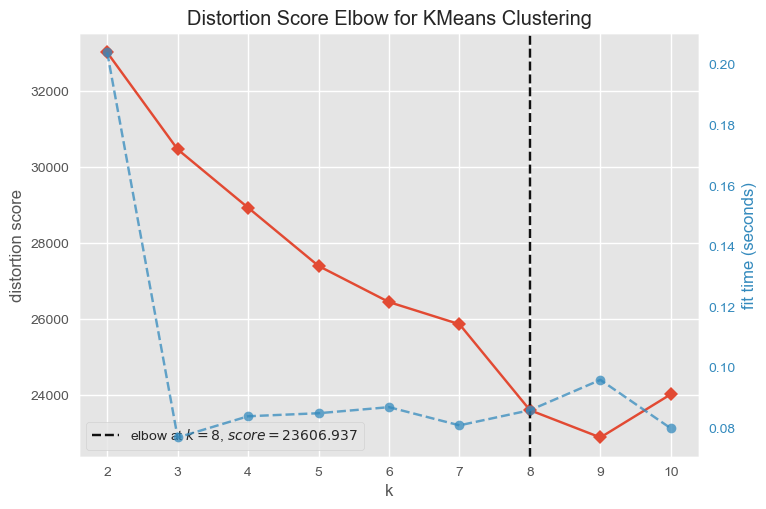

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
#ELBOW METHOD

print("Elbow Method to determine the number of clusters to be formed:")
elbow = KElbowVisualizer(KMeans(), k = 10)
elbow.fit(df1_reduced)
elbow.show()

------------------------------------- SILHOUETTE SCORE -------------------------------------

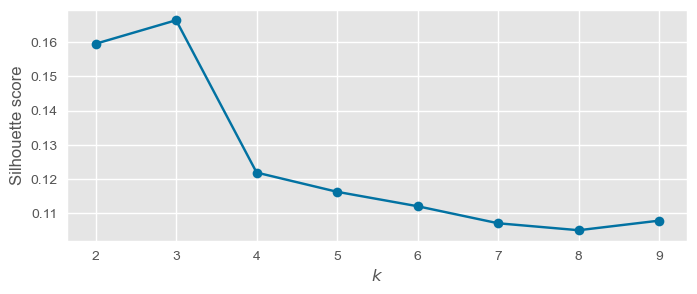

In [56]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(df1_reduced)
                for k in range(2, 11)]

silhouette_scores = [silhouette_score(df1_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.grid(True)

plt.show()

SILHOUETTE SCORE INDICA COTOVELO DE 3 PARA 4. PELO SCORE, SERÃO CONSIDERADOS 3 CLUSTERS

Silhouette score close to 1: The data point is well-clustered, meaning it is far from neighboring clusters.
Silhouette score close to 0: The data point is on or very close to the decision boundary between two neighboring clusters.
Silhouette score close to -1: The data point might have been assigned to the wrong cluster.

In [57]:
cluster_range = range(2, 10)
for i, score in zip(cluster_range, silhouette_scores):
  print(f"Silhouette Score for {i} Clusters:", score)

Silhouette Score for 2 Clusters: 0.15955961932974796
Silhouette Score for 3 Clusters: 0.16645098522130797
Silhouette Score for 4 Clusters: 0.12188521566768719
Silhouette Score for 5 Clusters: 0.1162528033629954
Silhouette Score for 6 Clusters: 0.11203101797587771
Silhouette Score for 7 Clusters: 0.10704957726070603
Silhouette Score for 8 Clusters: 0.10501665430673189
Silhouette Score for 9 Clusters: 0.10782405730820292


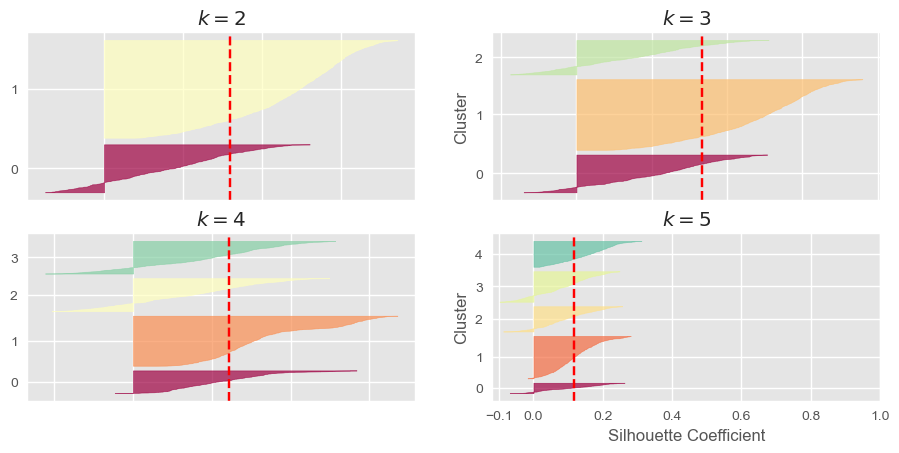

In [58]:
plt.figure(figsize=(11, 10))

for k in (2, 3, 4, 5):
    plt.subplot(4, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df1_reduced, y_pred)

    padding = len(df1_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

ESCOLHA PARA 4 CLUSTERS, CONSIDERANDO QUE O DIAGRAMA REPRESENTA UMA DISTRIBUIÇÃO CONSIDERÁVEL PARA CADA CLUSTER, SENDO O CLUSTER 1 COM MAIOR QUANTIDADE. 

NOS 4 CLUSTERS, A REFERÊNCIA PARA A LINHA TRACEJADA (MÉDIA SILHOUETTE SCORE) É CONSIDERADA SATISFATÓRIA PARA UMA ANÁLISE INICIAL

----------------------------------------------------------3 CLUSTERS----------------------------------------------------------

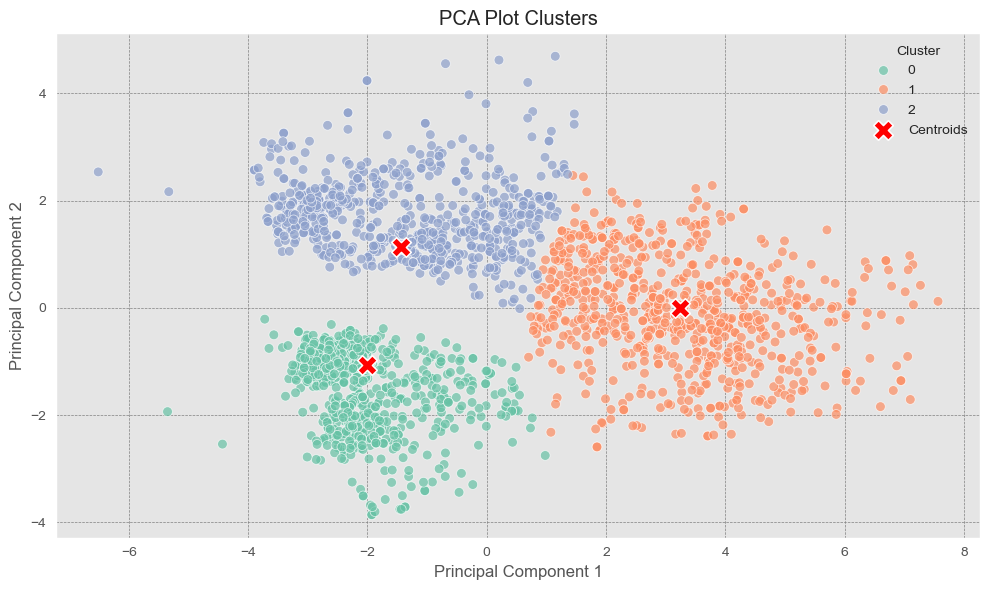

In [59]:
kmeans = KMeans(n_clusters= 3, random_state=42)  #change value of n_clusters
cluster_labels = kmeans.fit_predict(df1_reduced)
df1['Cluster'] = cluster_labels
df1.to_excel('Clustered_data.xlsx', index = False)


df2 = pd.read_excel('Clustered_data.xlsx')

scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df2)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]


cluster_palette = sns.color_palette("Set2", n_colors = len(df2['Cluster'].unique()))

plt.figure(figsize = (10, 6))

sns.scatterplot(df2, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = cluster_palette, alpha = 0.7)

plt.title("PCA Plot Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()


plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroids')
plt.legend(title = 'Cluster')


plt.show()

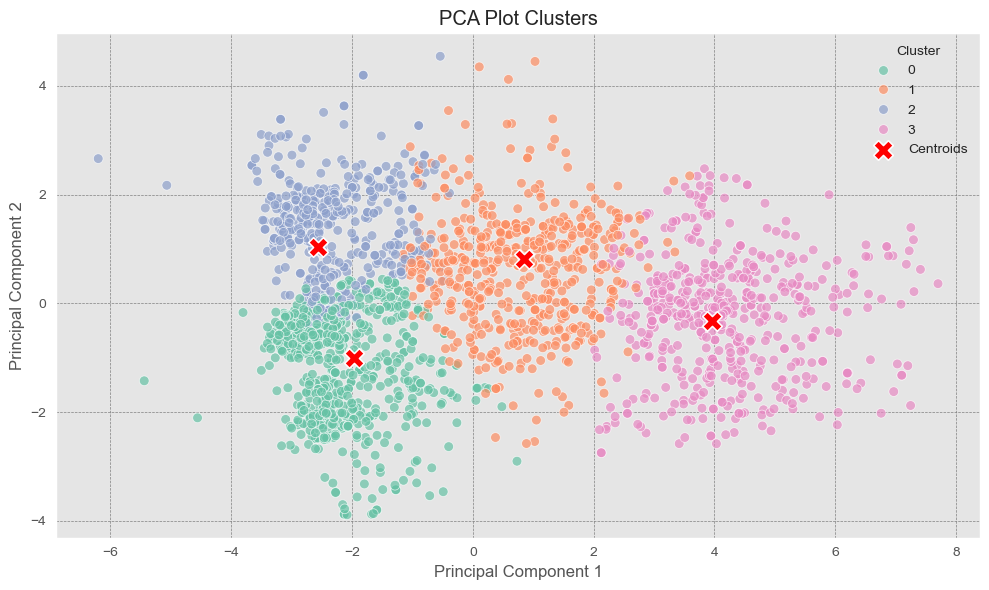

In [60]:
kmeans = KMeans(n_clusters= 4, random_state=42)  #change value of n_clusters
cluster_labels = kmeans.fit_predict(df1_reduced)
df1['Cluster'] = cluster_labels
df1.to_excel('Clustered_data.xlsx', index = False)


df3 = pd.read_excel('Clustered_data.xlsx')

scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df3)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

df3['PC1'] = pca_data[:, 0]
df3['PC2'] = pca_data[:, 1]


cluster_palette = sns.color_palette("Set2", n_colors = len(df3['Cluster'].unique()))

plt.figure(figsize = (10, 6))

sns.scatterplot(df3, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = cluster_palette, alpha = 0.7)

plt.title("PCA Plot Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()


plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroids')
plt.legend(title = 'Cluster')


plt.show()

In [63]:
kmeans = KMeans(n_clusters= 3, random_state=42)
cluster_labels = kmeans.fit_predict(df1_reduced)
df1['Cluster'] = cluster_labels
df1.to_excel('Clustered_data.xlsx', index = False)

In [64]:
df1.tail()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Age_on_2014,TotalChildren,Living_with,Family_size,Total_Amount_Spent,Total_Purchases,Accepted_Campaign,Deal_Dependency,Days_Since_Customer,Cluster
2235,0,3,61223.0,46,709,43,182,42,118,247,...,47,1,2,3,1341,18,0,0.111111,4103,1
2236,2,5,64014.0,56,406,0,30,0,0,8,...,68,3,2,5,444,22,1,0.318182,3741,2
2237,0,2,56981.0,91,908,48,217,32,12,24,...,33,0,1,1,1241,19,1,0.052632,3877,1
2238,1,5,69245.0,8,428,30,214,80,30,61,...,58,1,2,3,843,23,0,0.086957,3878,1
2239,2,3,52869.0,40,84,3,61,2,1,21,...,60,2,2,4,172,11,0,0.272727,4344,2


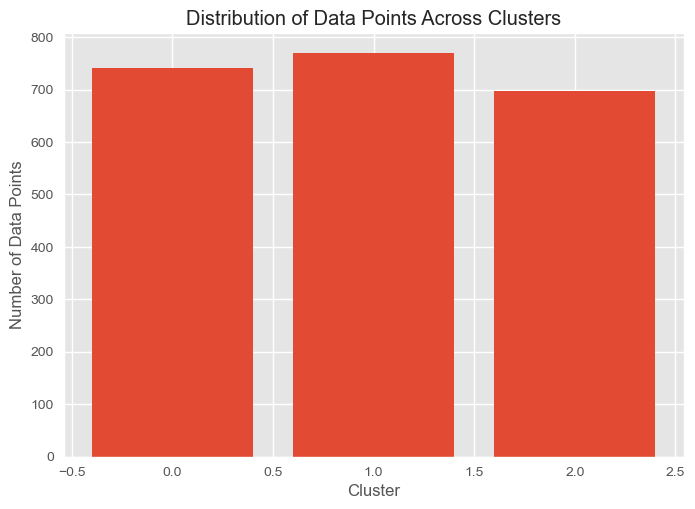

In [65]:
cluster_distribution = df1['Cluster'].value_counts().sort_index()

plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

In [67]:
# 4 CLUSTERS
kmeans = KMeans(n_clusters= 4, random_state=42)
cluster_labels = kmeans.fit_predict(df1_reduced)
df1['Cluster'] = cluster_labels
df1.to_excel('Clustered_data.xlsx', index = False)

In [68]:
df1['Cluster'] = cluster_labels
df1.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Age_on_2014,TotalChildren,Living_with,Family_size,Total_Amount_Spent,Total_Purchases,Accepted_Campaign,Deal_Dependency,Days_Since_Customer,Cluster
0,0,4,58138.0,58,635,88,546,172,88,88,...,57,0,0,1,1617,25,0,0.120000,4385,3
1,0,4,46344.0,38,11,1,6,2,1,6,...,60,2,0,3,27,6,0,0.333333,3835,2
2,0,5,71613.0,26,426,49,127,111,21,42,...,49,0,2,2,776,21,0,0.047619,4034,1
3,0,5,26646.0,26,11,4,20,10,3,5,...,30,1,2,3,53,8,0,0.250000,3861,0
4,2,3,58293.0,94,173,43,118,46,27,15,...,33,1,2,3,422,19,0,0.263158,3883,1


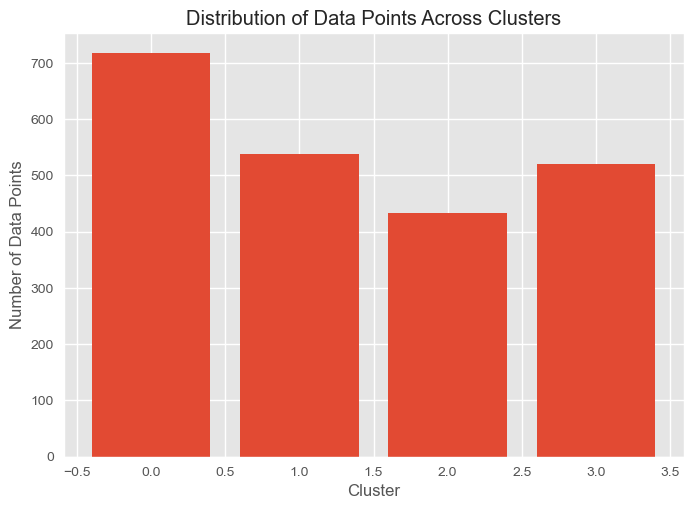

In [69]:
cluster_distribution = df1['Cluster'].value_counts().sort_index()

plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

------------------------ distribuição de dados entre os clusters ------------------------------

#Comparando a distribuição de dados para 3 e 4 clusters, a escolha por quatro clusters demonstrou melhor distribuição dos dados

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Age_on_2014', 'TotalChildren', 'Living_with', 'Family_size',
       'Total_Amount_Spent', 'Total_Purchases', 'Accepted_Campaign',
       'Deal_Dependency', 'Days_Since_Customer', 'Cluster'],
      dtype='object')


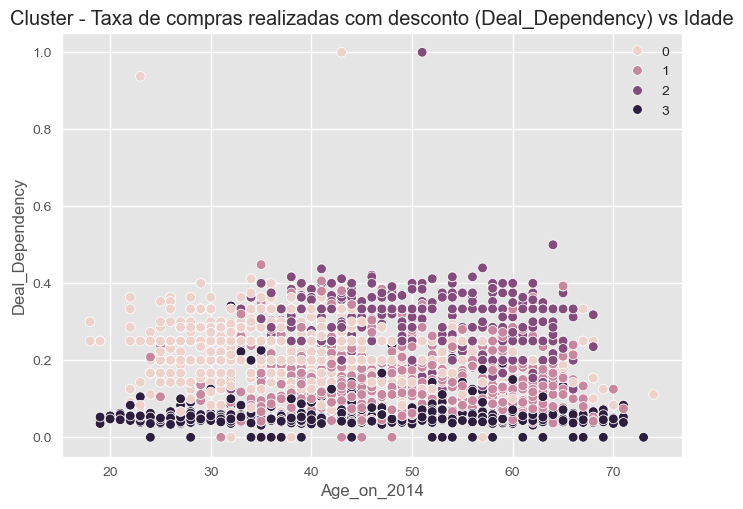

In [77]:
print(df1.columns)

sns.scatterplot(data=df1, x='Age_on_2014', y='Deal_Dependency', hue='Cluster')
plt.title("Cluster - Taxa de compras realizadas com desconto (Deal_Dependency) vs Idade")
plt.legend()
plt.show()

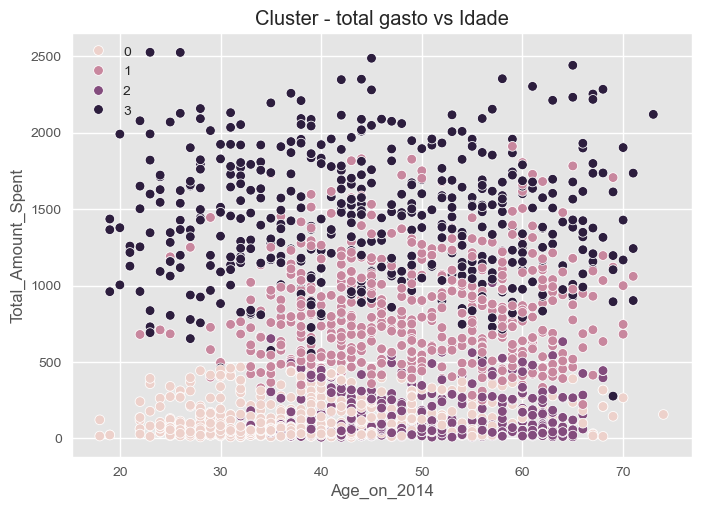

In [79]:
sns.scatterplot(data=df1, x='Age_on_2014', y='Total_Amount_Spent', hue='Cluster')
plt.title("Cluster - total gasto vs Idade")
plt.legend()
plt.show()

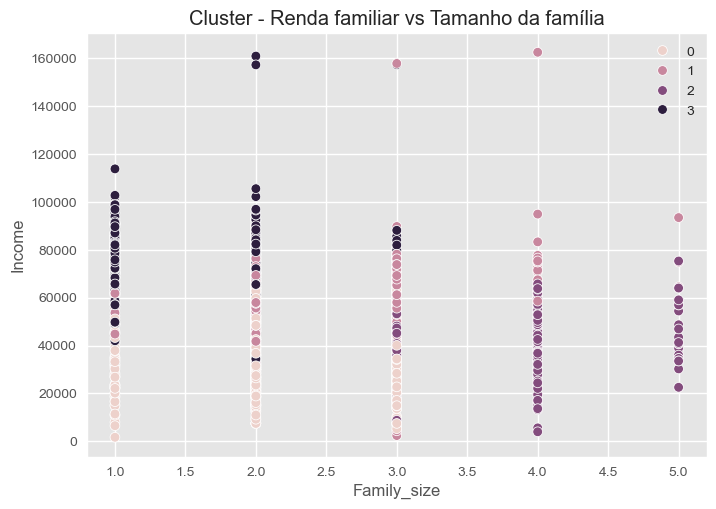

In [75]:
sns.scatterplot(data=df1, x='Family_size', y='Income', hue='Cluster')
plt.title("Cluster - Renda familiar vs Tamanho da família")
plt.legend()
plt.show()

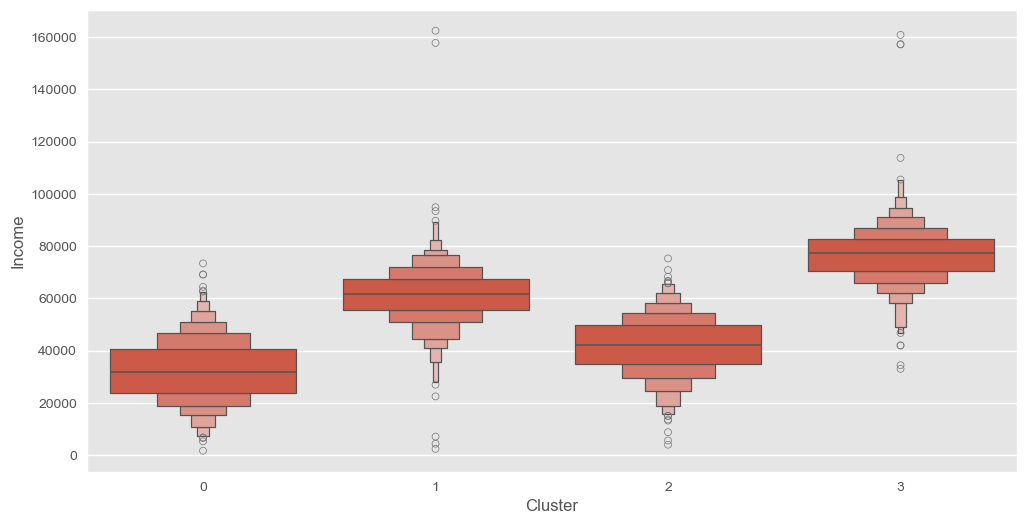

In [84]:
plt.figure(figsize = (12, 6))
sns.boxenplot(df1, x = 'Cluster', y = 'Income')

plt.show()

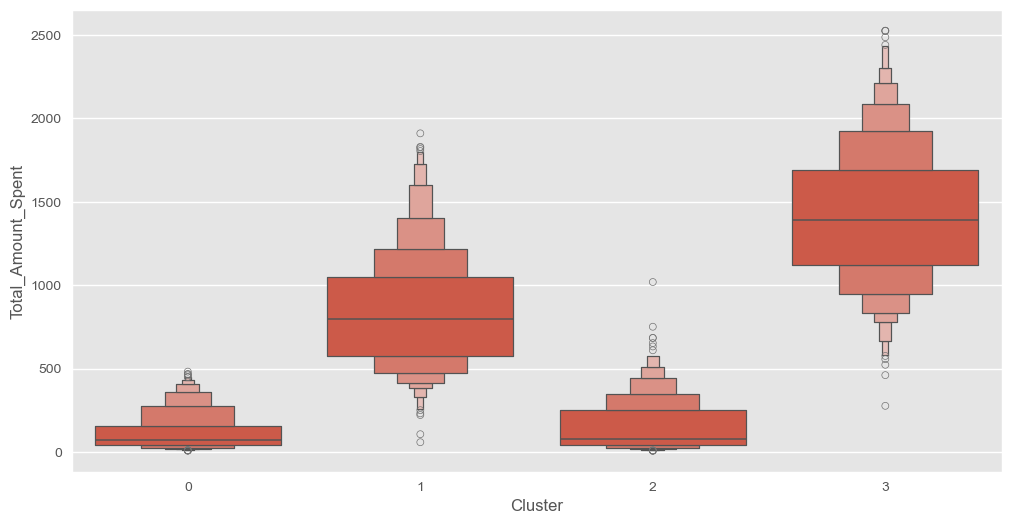

In [85]:
plt.figure(figsize = (12, 6))
sns.boxenplot(df1, x = 'Cluster', y = 'Total_Amount_Spent')

plt.show()

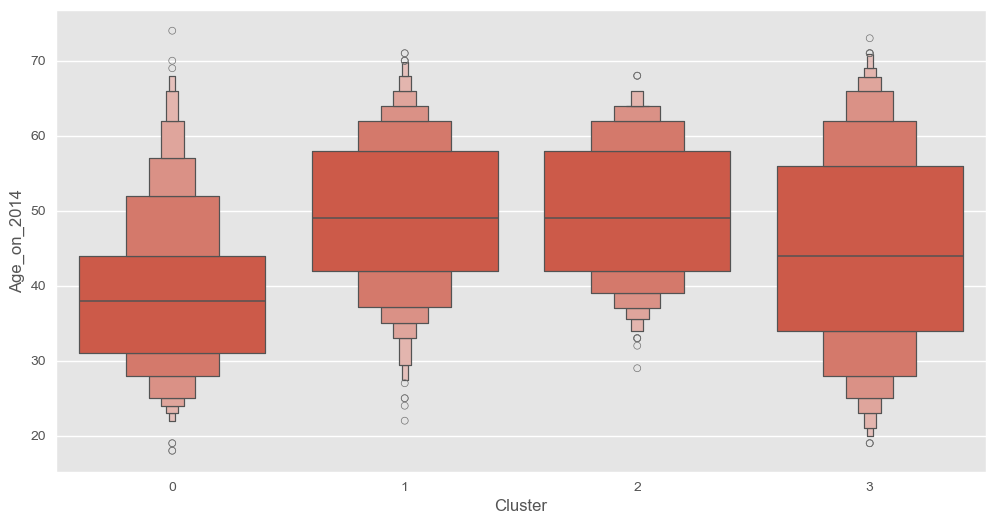

In [86]:
plt.figure(figsize = (12, 6))
sns.boxenplot(df1, x = 'Cluster', y = 'Age_on_2014')

plt.show()